In [4]:
import json
from collections import namedtuple
config = json.load(open("config.json"))
config["mode"] = "transfer"
config["pad_question"] = 50
config["pad_sentence"] = 50
#config["hidden_layer"] = 300
FLAGS = namedtuple('Struct', config.keys())(*config.values())

In [5]:
import pickle

vocab = pickle.load(open("vocab.pkl", "rb"))
char_vocab = pickle.load(open("char_vocab.pkl", "rb"))

In [6]:
import DataUtils

print("Load Glove")
emb = DataUtils.GloVe(FLAGS.embedding_path)

Load Glove
embedding dim is setted to 300


In [7]:
from Match_LSTM import MatchLSTM
import tensorflow as tf
tf.reset_default_graph()
model = MatchLSTM(FLAGS, vocab, char_vocab, emb)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Use keras.layers.batch_no

In [8]:
import os
sess = tf.Session()
saver = tf.train.Saver(tf.global_variables(), max_to_keep=FLAGS.num_checkpoints)
checkpoint_dir = os.path.abspath(os.path.join('runs/', "checkpoints"))
last_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
saver.restore(sess,last_checkpoint)
#sess.run(tf.global_variables_initializer())
print("loaded model from checkpoint {}".format(last_checkpoint))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home2/htthanh/Chinh/Question-Retrieval/snli_base_model_transfer/checkpoints/checkpoint-4
loaded model from checkpoint /home2/htthanh/Chinh/Question-Retrieval/snli_base_model_transfer/checkpoints/checkpoint-4


In [13]:
q = "bookmarked shares on a home server constantly disappearing after shutdown"
#a = "Men who drive automatics are nancy boys in my opinion...Might as well buy a Triumph Spitfire ir Tiida as your first car .."
a = "why do the ubuntu 11.10 file/share bookmarks always disappear between sessions ?"
#a = "Yes allowed"

In [14]:
from nltk.tokenize import word_tokenize
import spacy
en = spacy.load("en")

q = [[w.string.strip() for w in en(q.lower())] + ['<eos>']]
a = [[w.string.strip() for w in en(a.lower())] + ['<eos>']]
#q = [word_tokenize(q.lower()) + ['<eos>']]
#a = [word_tokenize(a.lower())  + ['<eos>']]
qi = vocab.vectorize(q, pad=50)
ai = vocab.vectorize(a, pad=50)
qi_char = char_vocab.vectorize(q, pad=15, seq_pad=50)
si_char = char_vocab.vectorize(a, pad=15, seq_pad=50)

In [15]:
af, ab, yp =sess.run([model.attention_fw, model.attention_bw, model.yp],
                feed_dict = {model.queries: qi,
                            model.hypothesis: ai,
                            model.queries_char: qi_char,
                            model.hypothesis_char: si_char,
                            model.dropout:1.0})
print(yp)

[[0.6838255]]


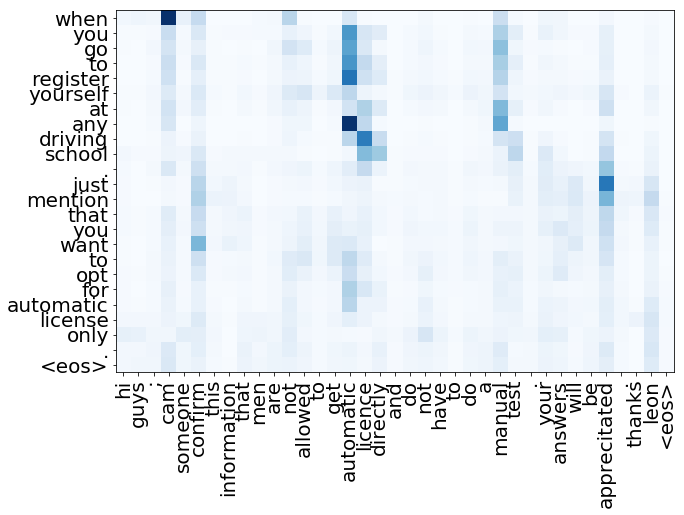

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(af[0,:len(a[0]),:len(q[0])], cmap='Blues')
plt.xticks(np.arange(len(q[0])), q[0],  rotation='vertical')
plt.yticks(np.arange(len(a[0])), a[0])
#plt.colorbar();
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('alo.png')
plt.show()
